In [1]:
!pip install pybithumb

     |████████████████████████████████| 111 kB 7.6 MB/s 
     |████████████████████████████████| 51 kB 442 kB/s 
     |████████████████████████████████| 251 kB 42.2 MB/s 


In [2]:
import pandas as pd
import numpy as np
import pybithumb 
import matplotlib.pyplot as plt
import datetime

In [3]:
df=pybithumb.get_ohlcv('BTC')
df.head()

,open,high,low,close,volume
time,,,,,
2013-12-27,737000.0,755000.0,737000.0,755000.0,3.780000
2013-12-28,750000.0,750000.0,750000.0,750000.0,12.000000
2013-12-29,750000.0,750000.0,728000.0,739000.0,19.058000
2013-12-30,740000.0,772000.0,740000.0,768000.0,9.488973
2013-12-31,768000.0,800000.0,763000.0,768000.0,18.650350


In [21]:
sma=7
fee=0.0032
threshold=5000000
df['returns']=np.log(df['close']/df['close'].shift(1))
df['SMA']=df['close'].rolling(window=sma).mean()
df['distance']=df['close']-df['SMA']


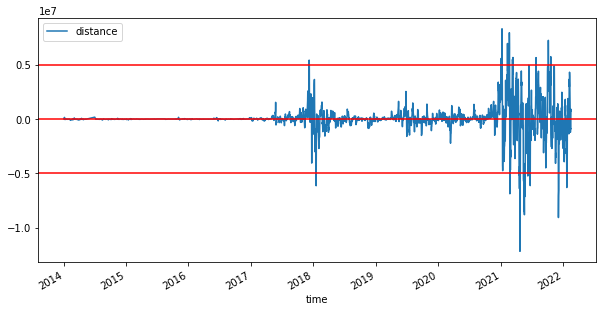

In [22]:
df['distance'].dropna().plot(figsize=(10,5),legend=True)
plt.axhline(threshold,color='r')
plt.axhline(-threshold,color='r')
plt.axhline(0,color='r')


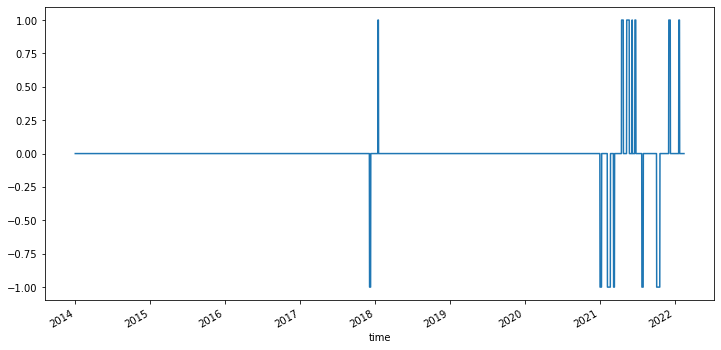

In [23]:
df['position']=np.where(df['distance']>threshold,-1,np.nan)
df['position']=np.where(df['distance']<-threshold,1,df['position'])
df['position']=np.where(df['distance']*df['distance'].shift(1)<0,0,df['position'])
df['position']=df['position'].ffill().fillna(0)
df['position'].iloc[sma:].plot(ylim=[-1.1,1.1],figsize=(12,6))

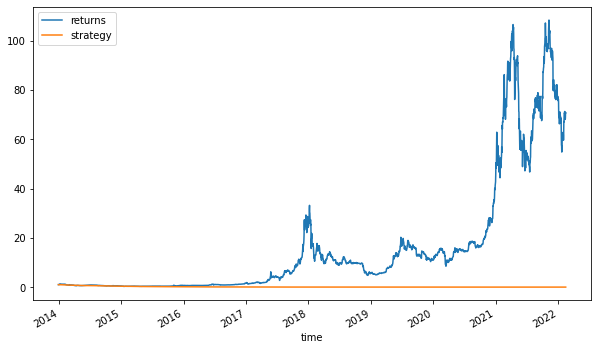

In [24]:
df['strategy']=df['position'].shift(1)*df['returns']-fee
df[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6),legend=True)